In [1]:
import torch
from torchviz import make_dot
import torch.nn as nn
from lstm_cnn_net import lstm_cnn

In [2]:
#define hyperparameters
input_len = 12
hidden_size = 128
num_layers = 2
num_classes = 4

In [3]:
model = lstm_cnn(input_len, hidden_size, num_layers, num_classes)
x = torch.randn(1, 301, 12)
y = model(x)

make_dot(y, params=dict(model.named_parameters()))

RuntimeError: Given groups=1, weight of size [64, 32, 10], expected input[1, 16, 147] to have 32 channels, but got 16 channels instead

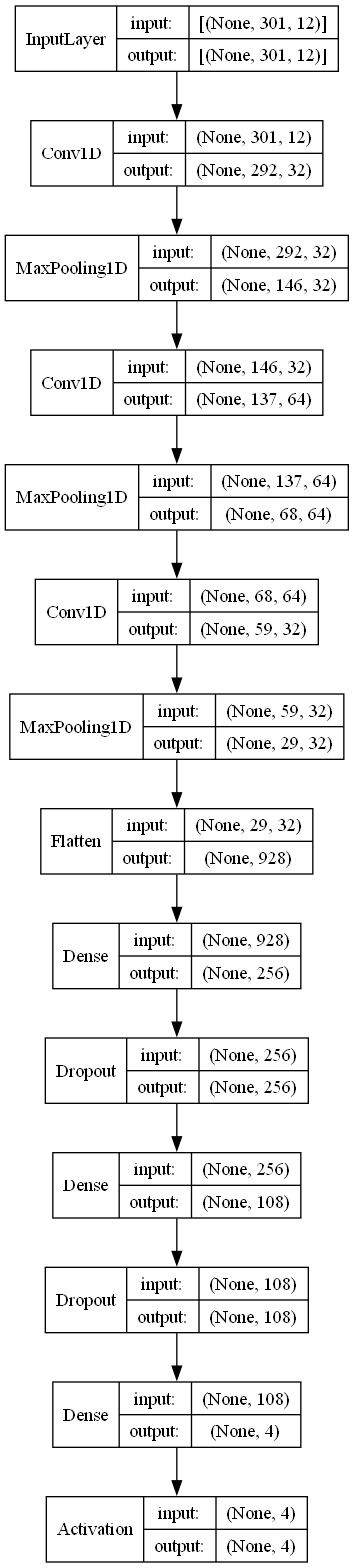

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
if tf.__version__.split('.')[0]=='2':
    from tensorflow import keras
else:
    import keras

# モデルをつくります
inputs = keras.layers.Input(shape=(301, 12))
x = keras.layers.Conv1D(32, 10, activation='relu')(inputs)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Conv1D(64, 10, activation='relu')(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Conv1D(32, 10, activation='relu')(x)
x = keras.layers.MaxPooling1D(2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(108, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4)(x)

predictions = keras.layers.Activation('softmax')(x)
model = keras.Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルを可視化します
keras.utils.plot_model(model, show_shapes=True, expand_nested=True,show_layer_names=False)
